### Appendix B: Performance of the Clenshaw summation

In this notebook we perform an analysis of the performance of the Clenshaw summation with respect to the direct evaluation of the Chebyshev partial sum for the MPS/QTT Chebyshev approximation algorithm. We perform the analysis for the oscillating function

$$
f_O(x) = \cos\left(\frac{1}{x^2 + \epsilon}\right)
$$

with $\epsilon = 1/100$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

# Add workspace to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from tools import merge_pkl, read_field, create_subplots

from seemps.state import DEFAULT_STRATEGY
from seemps.analysis.mesh import RegularInterval
from seemps.analysis.chebyshev import (
    cheb2mps,
    interpolation_coefficients,
)
from seemps import tools

tools.DEBUG = 1


DATA_PATH = "data/"
SHOW_FIGURES = True

### 1. Benchmark of the performance between the Clenshaw evaluation and the direct evaluation

In [2]:
# Set parameter ranges
range_n = list(range(2, 25 + 1))
range_d = (
    list(range(2, 10)) + list(range(10, 100, 10)) + list(range(100, 1300 + 1, 100))
)
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_d = 1300
fixed_t = 1e-14

# Load the data with respect to ranging the number of qubits n
params_n = {"n": range_n, "d": fixed_d, "t": fixed_t}
data_n = merge_pkl(params_n, name="clenshaw_osc", path="data/")

# Load the data with respect to ranging the order d
params_d = {"n": fixed_n, "d": range_d, "t": fixed_t}
data_d = merge_pkl(params_d, name="clenshaw_osc", path="data/")

# Load up results for the other functions with respect to t
params_t = {"n": fixed_n, "d": fixed_d, "t": range_t}
data_t = merge_pkl(params_t, name="clenshaw_osc", path="data/")

In [3]:
# fmt: off
from tools import set_plot_parameters

set_plot_parameters()

STYLE_S_B = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": "v", "color": "tab:green"}
STYLE_CLENSHAW = {"linestyle": "solid", "marker": None, "color": "tab:red", "label": "Clenshaw"}
STYLE_DIRECT = {"linestyle":  (0, (5, 1)), "marker": None, "color": "maroon", "label": "Partial sum"}

STYLE_CLENSHAW_GAUSSIAN = {"linestyle": "solid", "marker": None, "color": "tab:blue", "label": "Clenshaw"}
STYLE_DIRECT_GAUSSIAN = {"linestyle":  (0, (5, 1)), "marker": None, "color": "darkblue", "label": "Partial sum"}

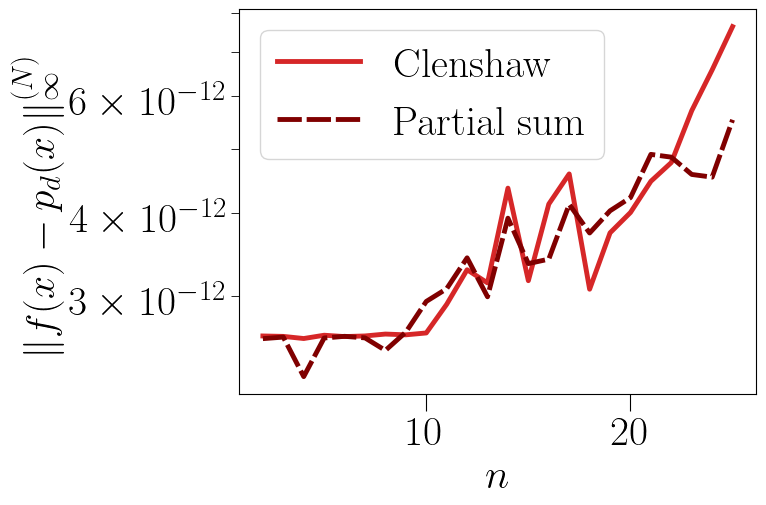

In [4]:
def plot_norms_n(ax):
    ax.plot(range_n, read_field(data_n, "error_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_n, read_field(data_n, "error_direct"), **STYLE_DIRECT)
    ax.set_yscale("log")
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

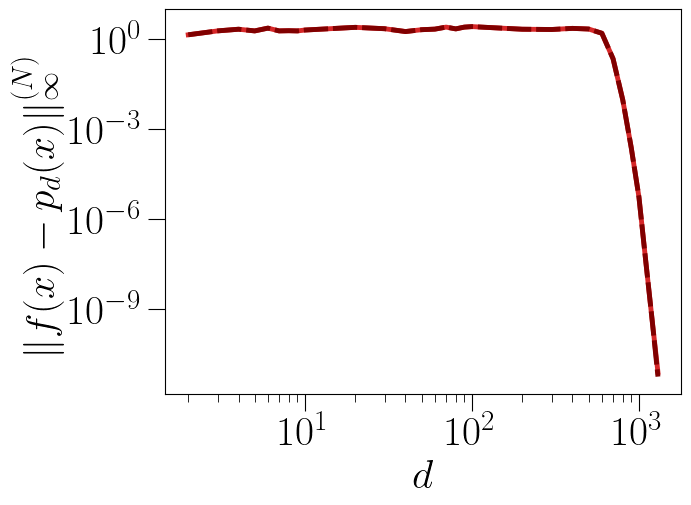

In [5]:
def plot_norms_d(ax):
    ax.plot(range_d, read_field(data_d, "error_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_d, read_field(data_d, "error_direct"), **STYLE_DIRECT)
    ax.set_yscale("log")
    ax.set_xscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

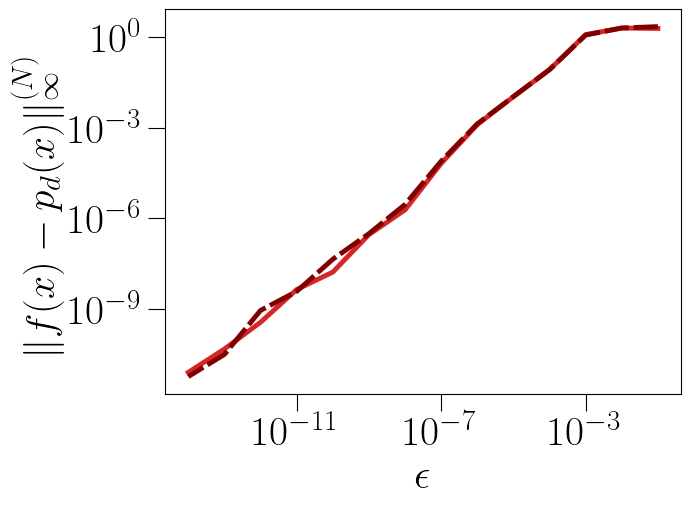

In [6]:
def plot_norms_t(ax):
    ax.plot(range_t, read_field(data_t, "error_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_t, read_field(data_t, "error_direct"), **STYLE_DIRECT)
    ax.set_yscale("log")
    ax.set_xscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

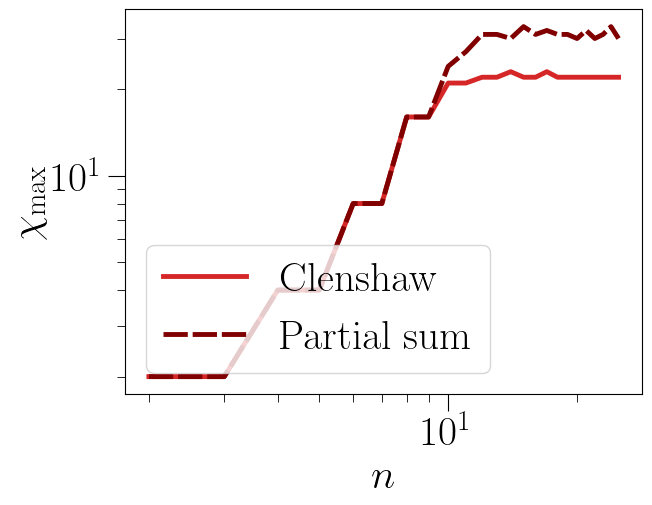

In [7]:
def plot_bonds_n(ax):
    ax.plot(range_n, read_field(data_n, "maxbond_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_n, read_field(data_n, "maxbond_direct"), **STYLE_DIRECT)
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

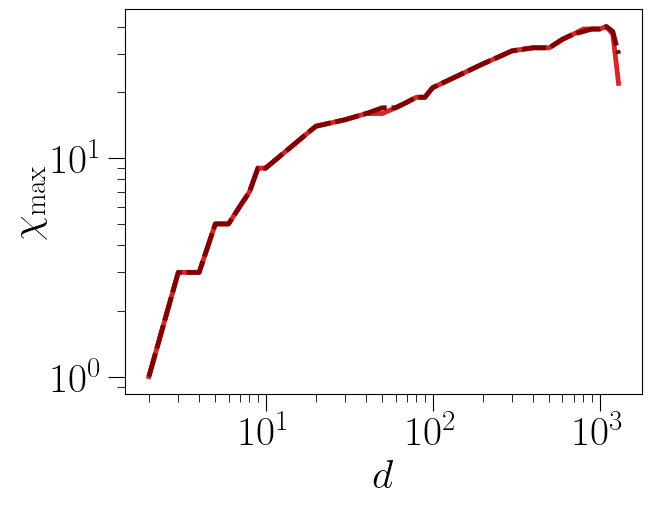

In [8]:
def plot_bonds_d(ax):
    ax.plot(range_d, read_field(data_d, "maxbond_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_d, read_field(data_d, "maxbond_direct"), **STYLE_DIRECT)
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

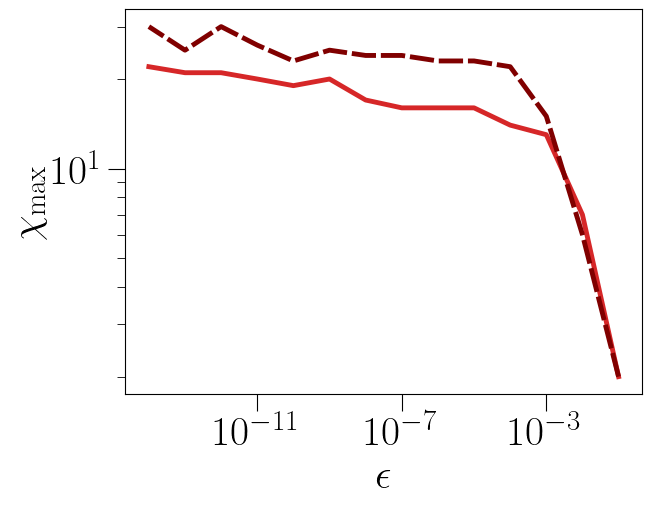

In [9]:
def plot_bonds_t(ax):
    ax.plot(range_t, read_field(data_t, "maxbond_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_t, read_field(data_t, "maxbond_direct"), **STYLE_DIRECT)
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

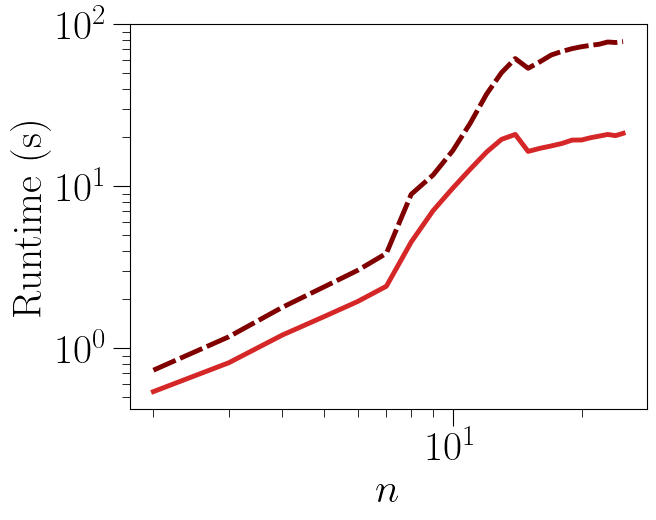

In [10]:
def plot_times_n(ax):
    ax.plot(range_n, read_field(data_n, "time_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_n, read_field(data_n, "time_direct"), **STYLE_DIRECT)
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel("Runtime (s)")

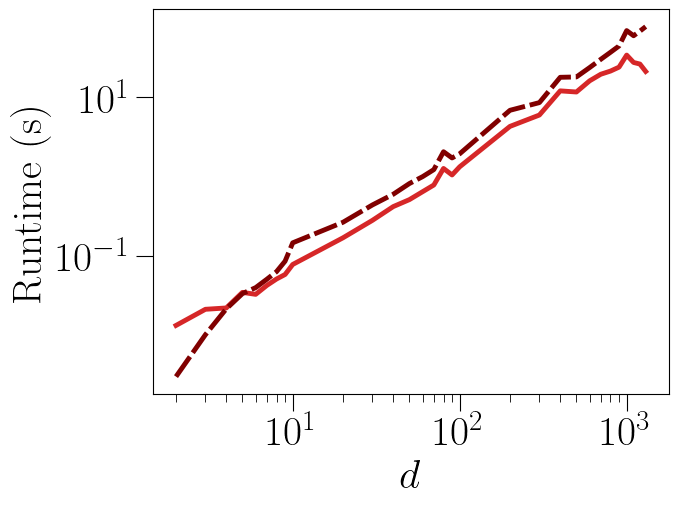

In [11]:
def plot_times_d(ax):
    ax.plot(range_d, read_field(data_d, "time_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_d, read_field(data_d, "time_direct"), **STYLE_DIRECT)
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel("Runtime (s)")

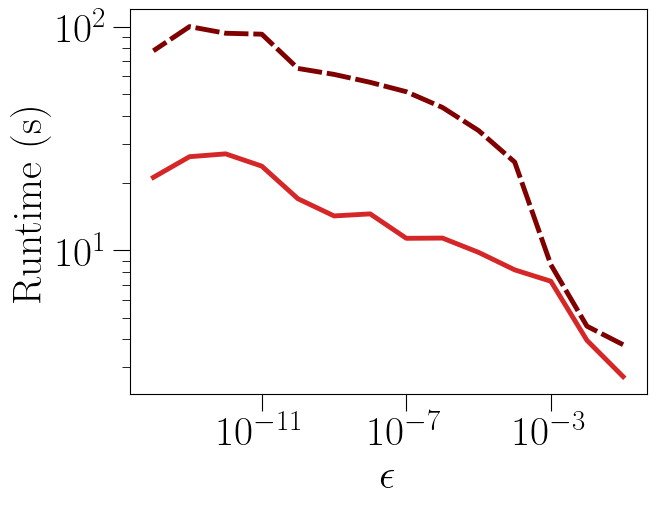

In [14]:
def plot_times_t(ax):
    ax.plot(range_t, read_field(data_t, "time_clenshaw"), **STYLE_CLENSHAW)
    ax.plot(range_t, read_field(data_t, "time_direct"), **STYLE_DIRECT)
    ax.set_xscale("log")
    ax.set_yscale("log")


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("Runtime (s)")

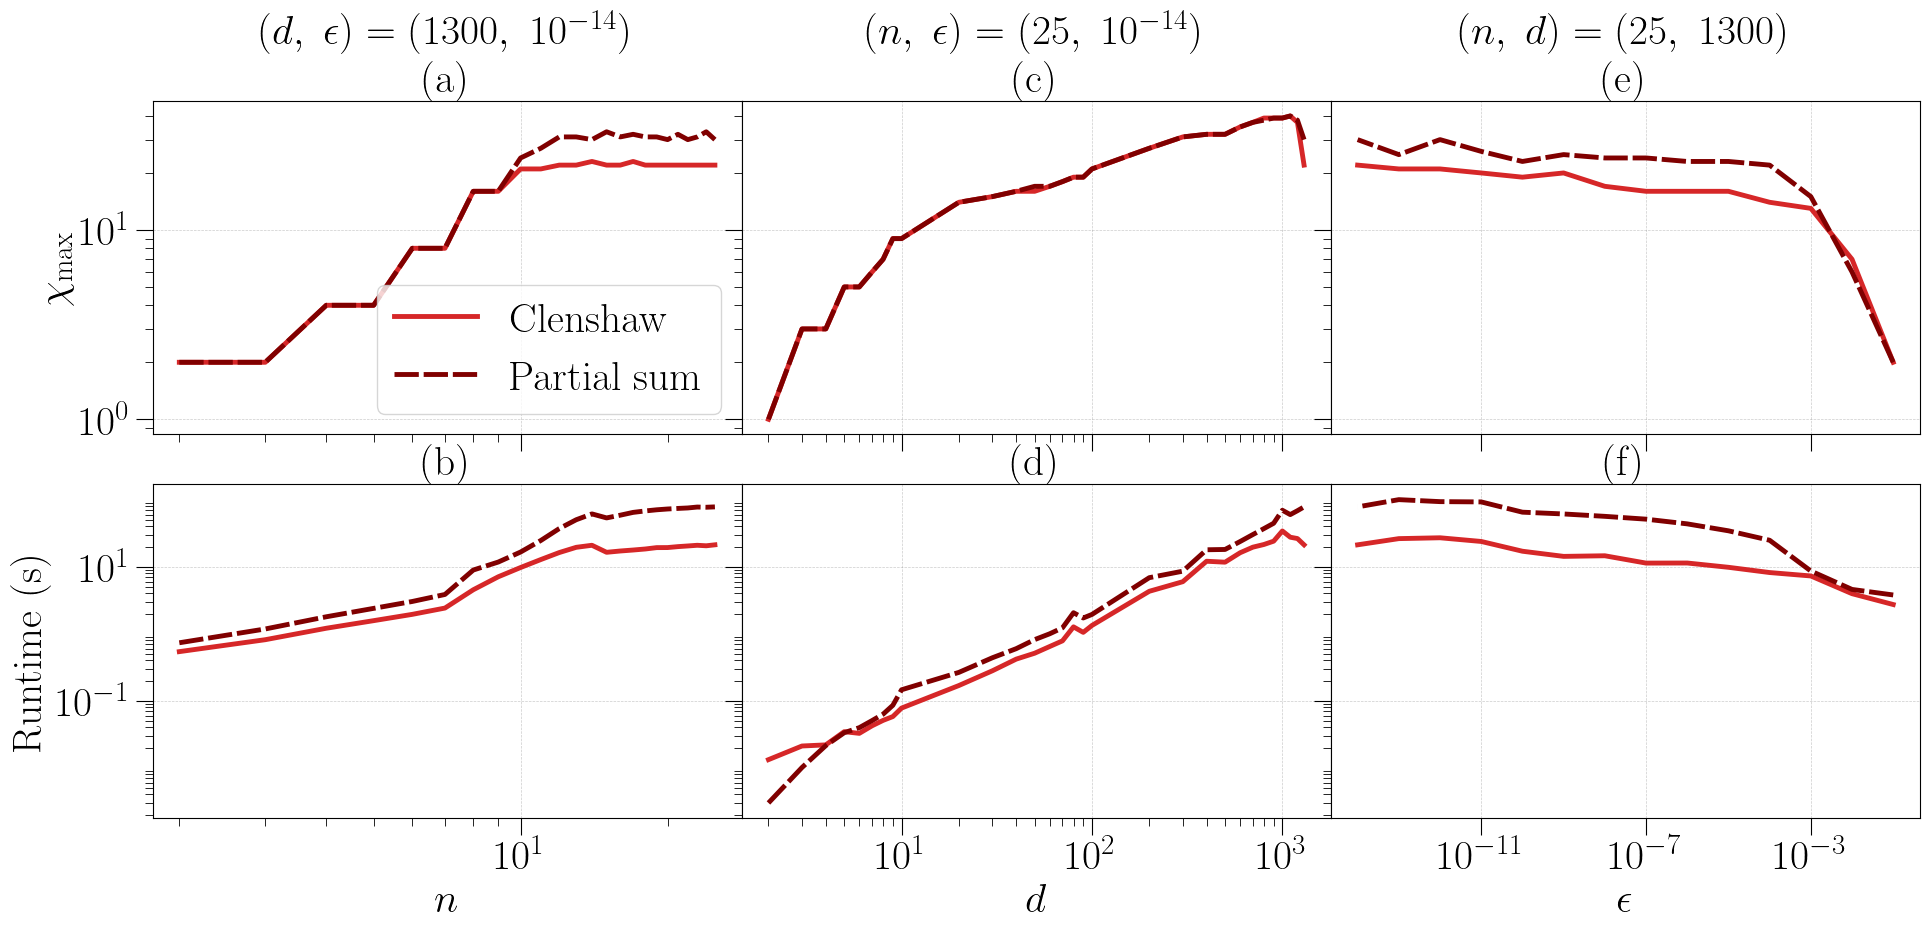

In [20]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(2, 3, sharex='col', sharey='row')

plot_bonds_n(axs[0, 0])
plot_bonds_d(axs[0, 1])
plot_bonds_t(axs[0, 2])
plot_times_n(axs[1, 0])
plot_times_d(axs[1, 1])
plot_times_t(axs[1, 2])

column_labels = [r"$n$", r"$d$", r"$\epsilon$"]
for ax, col in zip(axs[1], column_labels):
    ax.set_xlabel(col)
    
row_labels = [
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))


axs[0, 0].set_title(r"$(d, \ \epsilon) = (1300, \ 10^{-14})$" + "\n (a)")
axs[1, 0].set_title("(b)")
axs[0, 1].set_title(r"$(n, \ \epsilon) = (25, \ 10^{-14})$" + "\n (c)")
axs[1, 1].set_title("(d)")
axs[0, 2].set_title(r"$(n, \ d) = (25, \ 1300)$" + "\n (e)")
axs[1, 2].set_title("(f)")

plt.tight_layout()
fig.subplots_adjust(hspace=0.15, wspace=0.0)
plt.savefig("figures/clenshaw_benchmark.pdf", dpi=300, bbox_inches="tight")

### 2. Evaluate the maximum bond dimension for the intermediate steps

In [15]:
eps = 1 / 100
func = lambda x: np.cos(1 / (x + eps))
func = lambda x: np.exp(-(x**2))

n = 25
d = 200
t = 1e-14

strategy = DEFAULT_STRATEGY.replace(
    tolerance=t**2,
    simplification_tolerance=t**2,
)
domain = RegularInterval(-1, 1, 2**n)

coefficients = interpolation_coefficients(func, d, domain=domain)

By default, the `cheb2mps` algorithm does not return the intermediate bond dimensions, it just logs them. Hence, we capture them from the standard output.

In [16]:
import io
import contextlib
import re
import seemps.tools

seemps.tools.DEBUG = 1


def capture_maxbonds(clenshaw: bool):
    output_capture = io.StringIO()
    with contextlib.redirect_stdout(output_capture):
        cheb2mps(coefficients, domain=domain, strategy=strategy, clenshaw=clenshaw)
    log_string = output_capture.getvalue()
    pattern = r"maxbond=(\d+)"
    matches = re.findall(pattern, log_string)
    maxbonds = np.array(matches, dtype=int)
    return maxbonds


maxbonds_clenshaw = capture_maxbonds(True)
maxbonds_direct = capture_maxbonds(False)

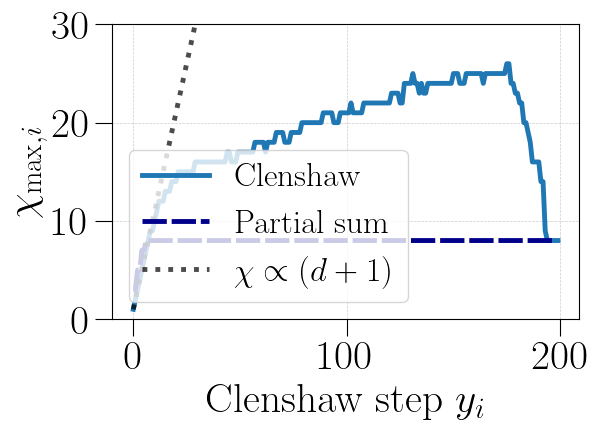

In [17]:
# fmt: off
x = np.array(range(d))

plt.plot(maxbonds_clenshaw, **STYLE_CLENSHAW_GAUSSIAN)
plt.plot(maxbonds_direct, **STYLE_DIRECT_GAUSSIAN)
plt.plot( x, x + 1, linestyle="dotted", color="k", label=r"$\chi \propto (d+1)$", alpha=0.7)
plt.ylim((0, 30))
plt.grid(which='major')

plt.xlabel(r"Clenshaw step $y_i$")
plt.ylabel(r"$\chi_{\mathrm{max}, i}$")
plt.legend(fontsize=24, loc='lower left')

plt.tight_layout()
plt.savefig("figures/clenshaw_bonds.pdf", dpi=300, bbox_inches="tight")
plt.show()